In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

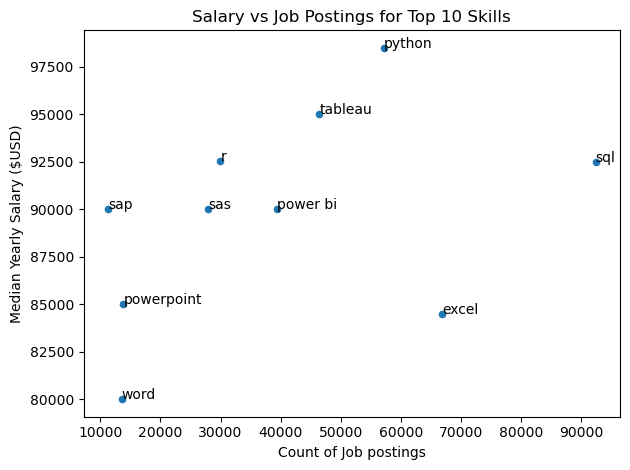

In [18]:
df =df[df['job_title_short'] == 'Data Analyst']
df_exploded = df.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg (skill_count = ('job_skills', 'count'), median_salary = ('salary_year_avg', 'median') )
skills_stats = skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)
skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title("Salary vs Job Postings for Top 10 Skills")
plt.xlabel("Count of Job postings")
plt.ylabel("Median Yearly Salary ($USD)")

for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)
plt.tight_layout()
plt.show()